## Load Packages and Data

In [76]:
#packages
import numpy as np
import scipy.optimize as opt
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import scipy.integrate as intgr
import numpy.linalg as lin
plt.style.use("ggplot")
%matplotlib inline

#data
incomes = np.loadtxt('incomes.txt')
sick = pd.read_csv("sick.txt")
inc_sim = np.linspace(0.01, 150000, 200) #fake data.

#initial guesses
sigma_init = 0.5
mu_init = 11
params_init = [mu_init,sig_init]

In [77]:
incomes = np.loadtxt('incomes.txt')
sick = pd.read_csv("sick.txt")
inc_sim = np.linspace(0.01, 150000, 200)

sigma_init = 0.5
mu_init = 11
params_init = [mu_init,sig_init]

In [78]:
def log_norm_pdf(xvals, mu, sigma, cutoff):## log normal dist w/ truncated
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.lognorm.cdf(cutoff, s=sigma, loc=mu, scale=np.exp(mu)) # use lognormal CDF function
            
    log_pdf_vals = (((1/(xvals * sigma * np.sqrt(2 * np.pi))) *
                    np.exp( - ((np.log(xvals)) - mu)**2 / (2 * sigma**2))) / 
                    prob_notcut)
    
    
    (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp(-(xvals)**2 / (2 * sigma**2)))
    
    #return log_pdf_vals
    return prob_notcut

def log_lik_norm(xvals, mu, sigma, cutoff): ## log liklihood for lognormal
    pdf_vals = log_norm_pdf(xvals, mu, sigma, cutoff) #this is the line that makes it lognormal 
    ln_pdf_vals = np.log(pdf_vals) 
    log_lik_val = ln_pdf_vals.sum() 
   
    return log_lik_val 


def crit(params, *args): ## criterion function. neg of logliklihood
    mu, sigma = params 
    xvals, cutoff = args
    log_lik_val = log_lik_norm(xvals, mu, sigma, cutoff) 
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

mu_init = 11
sig_init = 0.5
params_init = [mu_init,sig_init]

mle_args = (incomes, 150000) # real data, cutoff

results = opt.minimize(loglike, params_init, args = incomes, method='L-BFGS-B',bounds=((0.1, None),(0.1, None)))
mu_MLE, sig_MLE = results.x
log_norm_pdf(xvals = inc_sim, mu = mu_init, sigma = sigma_init, cutoff = )


SyntaxError: invalid syntax (<ipython-input-78-a829ae516f1c>, line 37)

### a) Make a histogram

ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

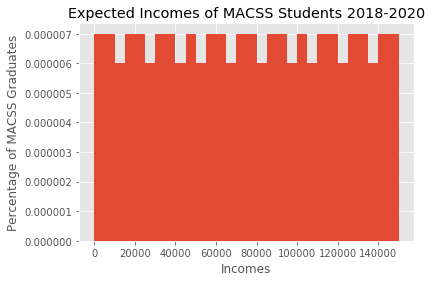

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.hist(incomes, bins = 30, normed = True)
count, bins, ignored = plt.hist(inc_sim, bins = 30, normed = True, label = 'Actual Outcomes')
plt.title("Expected Incomes of MACSS Students 2018-2020")
plt.xlabel("Incomes")
plt.ylabel("Percentage of MACSS Graduates")


income_lognorm = log_norm_pdf(xvals = inc_sim, mu = mu_init, sigma = sigma_init, cutoff = 150000)
plt.plot(inc_sim, income_lognorm, linewidth = 1, color = 'r', label = "Lognormal PDF")

plt.plot(inc_sim, log(inc_sim, mu_MLE, sig_MLE), color = 'g', label = "Log Distribution, mu = 11.3, sigma= 0.20")

plt.legend(loc = 'upper left')

### b) Plot the lognormal PDF

In [80]:
income_lognorm = log_norm_pdf(xvals = inc_sim, mu = mu_init, sigma = sigma_init, cutoff = 'None')
#plt.plot(inc_sim, income_lognorm, linewidth = 1, color = 'r')

In [81]:
loglikeval = log_lik_norm(incomes, mu = mu_init, sigma = sigma_init, cutoff= 'None')

print('The log liklihood value is', loglikeval)

The log liklihood value is 0.0


### c) Estimate the parameters of the lognormal distribution by maximum likelihood

##### Estimate Parameters

In [82]:
mu_init = 11
sig_init = 0.5
params_init = [mu_init,sig_init]
results = opt.minimize(loglike, params_init, args = incomes, method='L-BFGS-B',bounds=((0.1, None),(0.1, None)))
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
results

mu_MLE= 11.3590243967  sig_MLE= 0.208178530156


      fun: 2241.7193013685201
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00645741,  0.01114131])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 10
   status: 0
  success: True
        x: array([ 11.3590244 ,   0.20817853])

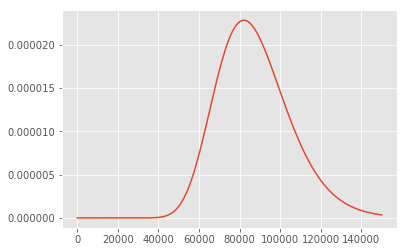

In [83]:
plt.plot(inc_sim, log(inc_sim, mu_MLE, sig_MLE))

##### VCV 

In [28]:
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
vcv_mle

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[  2.52831353e-04  -2.76208826e-05]
 [ -2.76208826e-05   1.30457089e-04]]
Standard error for mu estimate =  0.0159006714777
Standard error for sigma estimate =  0.0114217813365


##### Value of Liklihood Function

In [29]:
loglikeval = loglike(params_init,inc_sim)
print("The Value of Liklihood Function is:", - loglikeval)

The Value of Liklihood Function is: -2385.85699781


### d) Likelihood Ratio Test

In [30]:
log_lik_h0 = log_lik_norm(incomes,mu_init,sigma_init,150000)
log_lik_mle = log_lik_norm(incomes,mu_MLE, sig_MLE,150000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = {:.4f} '.format(pval_h0))
print('reject the null hypothesis that data comes from the original model')

chi squared of H0 with 2 degrees of freedom p-value = 0.0000 
reject the null hypothesis that data comes from the original model


### e) Proability of Earning More Than 100k. Probability of Earning Less Than 75k

In [31]:
lessthan75 = sts.lognorm.cdf(75000, s=sig_MLE, loc=mu_MLE, scale=np.exp(mu_MLE))

print('The probability of earning less than 75k is {:.4f}'.format(lessthan75))


The probability of earning less than 75k is 0.2600


In [32]:
morethan100 = 1 - sts.lognorm.cdf(100000, s=sig_MLE, loc=mu_MLE, scale=np.exp(mu_MLE))

print('The probability of earning more than 100k is {:.5f}'.format(morethan100))

The probability of earning more than 100k is 0.23004


# Question 2 - Linear Regression and MLE

### a) Estimate the parameters by maximum liklihood

In [33]:
def norm_pdf(xvals, sigma):
    
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp(-(xvals)**2 / (2 * sigma**2)))
    ln_pdf_vals = np.log(pdf_vals) # take log 
    log_lik_val = ln_pdf_vals.sum() # sum the logs
    
    return log_lik_val  # returns values of log likelihood function

In [34]:
def crit(params,*args):
    beta0, beta1, beta2, beta3, sigma = params
    y, x1, x2, x3 = args
    
    err = y - beta0 - beta1*x1 - beta2*x2 - beta3*x3
    log_lik_val = norm_pdf(err, sigma) # get the value of log likelihood function
    neg_log_lik_val = -log_lik_val # get negative value for minimizer
    return(neg_log)



bd = ((None, None),(None, None), (None, None), (None, None), (0.001, None))
results2 = opt.minimize(crit, [1,0,0,0,1], bounds=bd, method='SLSQP')

print("My parameter estimates are:", results2.x)
print("My logliklihood estimate is: ", results2.fun)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


My parameter estimates are: [ 0.25164545  0.01293337  0.40050191 -0.00999164  0.001     ]
My logliklihood estimate is:  -506.077176157


##### VCV

In [35]:
results3 = opt.minimize(crit, results2.x, bounds=bd, method='L-BFGS-B')
hessian = results3.hess_inv.todense()
OffDiagNeg = np.eye(5)*2-1
vcv_mle1 = results3.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle1[0,0])
stderr_sig_mle = np.sqrt(vcv_mle1[1,1])
print('VCV(MLE) = ', vcv_mle1)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[ 1. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]]
Standard error for mu estimate =  1.0
Standard error for sigma estimate =  1.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


### b) Determine the Value of the Log Liklihood

In [36]:
newparams = [1, 0 , 0 ,0, .01]
log_lik_h0 = -crit(newparams)

LR_val2 = 2 * (results2.fun - log_lik_h0)
pval_LR_2 = 1.0 - sts.chi2.cdf(LR_val2, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = {:.5f}'.format(pval_LR_2))

chi squared of H0 with 2 degrees of freedom p-value = 0.00000


##### Hence, we reject the null hypothesis that age, number of children, and average winter temperature does not have effect on the number of sick days